# MA3K7 Particle Collision Problem 

**Student Number: 2110308**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import binom
from sympy import symbols, solve
import math
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from numba import jit
import time

The code below simulates a closed system with particle collisions

In [4]:
class Particle:
    def __init__(self, species):
        self.species = species

def collide(particles):
    # Select two random particles
    particle1 = random.choice(particles)
    particle2 = random.choice(particles)
    
    # If the two particles are of different species, they transform into the third species
    if particle1.species != particle2.species:
        species_set = {'A', 'B', 'C'}
        new_species = (species_set - {particle1.species, particle2.species}).pop()
        particle1.species = new_species
        particle2.species = new_species

def count_species(particles):
    species_count = {'A': 0, 'B': 0, 'C': 0}
    for particle in particles:
        species_count[particle.species] += 1
    return species_count

def simulate(num_A, num_B, num_C, num_steps):
    particles = [Particle('A') for _ in range(num_A)] + \
                [Particle('B') for _ in range(num_B)] + \
                [Particle('C') for _ in range(num_C)]
    
    for step in range(num_steps):
        collide(particles)
        
    species_counts = count_species(particles)
    print("Final distribution of species after {} steps:".format(num_steps))
    for species, count in species_counts.items():
        print("Species {}: {}".format(species, count))

In [5]:
#Number of each particle species is 1
simulate(1, 1, 1, 1000)

Final distribution of species after 1000 steps:
Species A: 0
Species B: 0
Species C: 3


In [6]:
#Number of each particle species is 2
simulate(2, 2, 2, 1000)

Final distribution of species after 1000 steps:
Species A: 0
Species B: 0
Species C: 6


In [7]:
#Number of each particle species is 3
simulate(3, 3, 3, 1000)

Final distribution of species after 1000 steps:
Species A: 0
Species B: 0
Species C: 9


In [8]:
#Number of each particle species is 4
simulate(4, 4, 4, 1000)

Final distribution of species after 1000 steps:
Species A: 2
Species B: 5
Species C: 5


In [9]:
#Number of each particle species is 5
simulate(5, 5, 5, 1000)

Final distribution of species after 1000 steps:
Species A: 9
Species B: 3
Species C: 3


In [10]:
#Number of each particle species is 6
simulate(6, 6, 6, 1000)

Final distribution of species after 1000 steps:
Species A: 4
Species B: 7
Species C: 7


In [11]:
#Number of each particle species is 7
simulate(7, 7, 7, 1000)

Final distribution of species after 1000 steps:
Species A: 2
Species B: 11
Species C: 8


In [12]:
#Number of each particle species is 8
simulate(8, 8, 8, 1000)

Final distribution of species after 1000 steps:
Species A: 10
Species B: 7
Species C: 7


In [13]:
#Number of each particle species is 9
simulate(9, 9, 9, 1000)

Final distribution of species after 1000 steps:
Species A: 19
Species B: 4
Species C: 4


In [14]:
#Number of each particle species is 10
simulate(10, 10, 10, 1000)

Final distribution of species after 1000 steps:
Species A: 11
Species B: 5
Species C: 14


The code below runs $10000$ simulations with $1000$ particles and plots results after exactly $10000$ collisions have occurred.

Frequency of Dominant Species after 10000 Simulations:
{'A': 0, 'B': 0, 'C': 0, 'None': 10000}


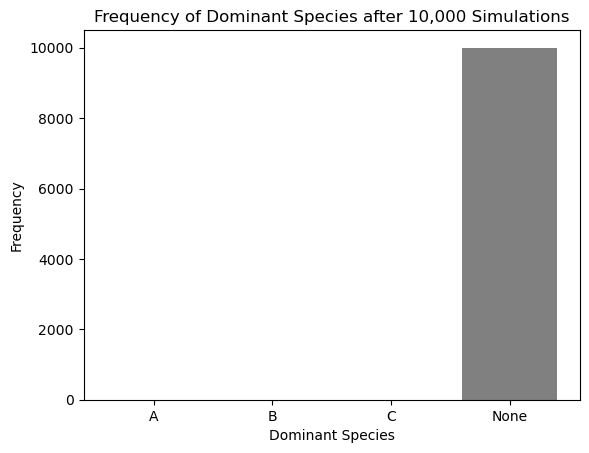

In [15]:
class Particle:
    def __init__(self, species):
        self.species = species

def collide(particles):
    # Select two random particles
    particle1 = random.choice(particles)
    particle2 = random.choice(particles)
    
    # If the two particles are of different species, they transform into the third species
    if particle1.species != particle2.species:
        species_set = {'A', 'B', 'C'}
        new_species = (species_set - {particle1.species, particle2.species}).pop()
        particle1.species = new_species
        particle2.species = new_species

def count_species(particles):
    species_count = {'A': 0, 'B': 0, 'C': 0}
    for particle in particles:
        species_count[particle.species] += 1
    return species_count

def simulate(num_A, num_B, num_C, num_steps):
    particles = [Particle('A') for _ in range(num_A)] + \
                [Particle('B') for _ in range(num_B)] + \
                [Particle('C') for _ in range(num_C)]
    
    for step in range(num_steps):
        collide(particles)
        
    species_counts = count_species(particles)
    return species_counts

def run_simulation(num_simulations, num_particles, num_steps):
    domination_counts = {'A': 0, 'B': 0, 'C': 0, 'None': 0}
    
    for _ in range(num_simulations):
        species_counts = simulate(num_particles, num_particles, num_particles, num_steps)
        max_count_species = max(species_counts, key=species_counts.get)
        
        if species_counts[max_count_species] == num_particles * 3:
            domination_counts[max_count_species] += 1
        else:
            domination_counts['None'] += 1
    
    return domination_counts

def plot_results(domination_counts):
    labels = list(domination_counts.keys())
    counts = list(domination_counts.values())
    
    plt.bar(labels, counts, color=['blue', 'green', 'red', 'gray'])
    plt.xlabel('Dominant Species')
    plt.ylabel('Frequency')
    plt.title('Frequency of Dominant Species after 10,000 Simulations')
    plt.show()

# Run simulation
num_simulations = 10000
num_particles = 1000  
num_steps = 10000

domination_counts = run_simulation(num_simulations, num_particles, num_steps)
print("Frequency of Dominant Species after {} Simulations:".format(num_simulations))
print(domination_counts)

# Plot results
plot_results(domination_counts)

The code below does the same thing as the code above but reduces the number of particles to $100$.

Frequency of Dominant Species after 10000 Simulations:
{'A': 0, 'B': 0, 'C': 0, 'None': 10000}


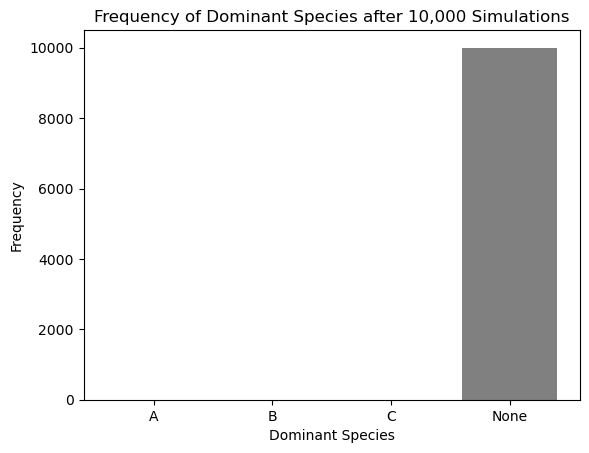

In [16]:
class Particle:
    def __init__(self, species):
        self.species = species

def collide(particles):
    # Select two random particles
    particle1 = random.choice(particles)
    particle2 = random.choice(particles)
    
    # If the two particles are of different species, they transform into the third species
    if particle1.species != particle2.species:
        species_set = {'A', 'B', 'C'}
        new_species = (species_set - {particle1.species, particle2.species}).pop()
        particle1.species = new_species
        particle2.species = new_species

def count_species(particles):
    species_count = {'A': 0, 'B': 0, 'C': 0}
    for particle in particles:
        species_count[particle.species] += 1
    return species_count

def simulate(num_A, num_B, num_C, num_steps):
    particles = [Particle('A') for _ in range(num_A)] + \
                [Particle('B') for _ in range(num_B)] + \
                [Particle('C') for _ in range(num_C)]
    
    for step in range(num_steps):
        collide(particles)
        
    species_counts = count_species(particles)
    return species_counts

def run_simulation(num_simulations, num_particles, num_steps):
    domination_counts = {'A': 0, 'B': 0, 'C': 0, 'None': 0}
    
    for _ in range(num_simulations):
        species_counts = simulate(num_particles, num_particles, num_particles, num_steps)
        max_count_species = max(species_counts, key=species_counts.get)
        
        if species_counts[max_count_species] == num_particles * 3:
            domination_counts[max_count_species] += 1
        else:
            domination_counts['None'] += 1
    
    return domination_counts

def plot_results(domination_counts):
    labels = list(domination_counts.keys())
    counts = list(domination_counts.values())
    
    plt.bar(labels, counts, color=['blue', 'green', 'red', 'gray'])
    plt.xlabel('Dominant Species')
    plt.ylabel('Frequency')
    plt.title('Frequency of Dominant Species after 10,000 Simulations')
    plt.show()

# Run simulation
num_simulations = 10000
num_particles = 100  
num_steps = 10000

domination_counts = run_simulation(num_simulations, num_particles, num_steps)
print("Frequency of Dominant Species after {} Simulations:".format(num_simulations))
print(domination_counts)

# Plot results
plot_results(domination_counts)

The code below changes the initial condition to make it 'unfair' and plots the results of $10000$ simulations with $1000$ collisions each.

Frequency of Dominant Species after 10000 Simulations:
{'A': 0, 'B': 0, 'C': 0, 'None': 10000}


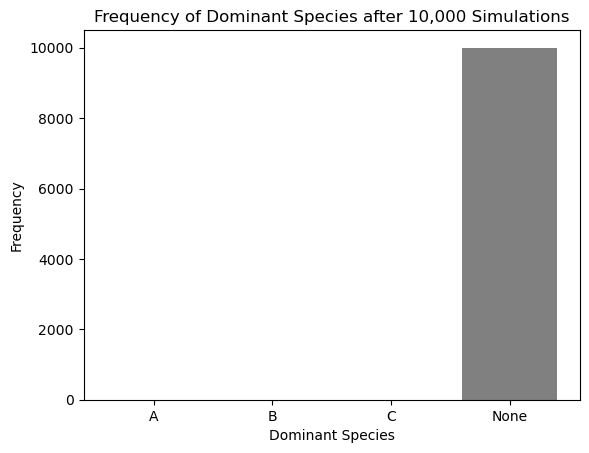

In [17]:
import random
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, species):
        self.species = species

def collide(particles):
    # Select two random particles
    particle1 = random.choice(particles)
    particle2 = random.choice(particles)
    
    # If the two particles are of different species, they transform into the third species
    if particle1.species != particle2.species:
        species_set = {'A', 'B', 'C'}
        new_species = (species_set - {particle1.species, particle2.species}).pop()
        particle1.species = new_species
        particle2.species = new_species

def count_species(particles):
    species_count = {'A': 0, 'B': 0, 'C': 0}
    for particle in particles:
        species_count[particle.species] += 1
    return species_count

def simulate(num_A, num_B, num_C, num_steps):
    particles = [Particle('A') for _ in range(num_A)] + \
                [Particle('B') for _ in range(num_B)] + \
                [Particle('C') for _ in range(num_C)]
    
    for step in range(num_steps):
        collide(particles)
        
    species_counts = count_species(particles)
    return species_counts

def run_simulation(num_simulations, num_A, num_B, num_C, num_steps):
    domination_counts = {'A': 0, 'B': 0, 'C': 0, 'None': 0}
    
    for _ in range(num_simulations):
        species_counts = simulate(num_A, num_B, num_C, num_steps)
        max_count_species = max(species_counts, key=species_counts.get)
        
        if species_counts[max_count_species] == num_A + num_B + num_C:
            domination_counts[max_count_species] += 1
        else:
            domination_counts['None'] += 1
    
    return domination_counts

def plot_results(domination_counts):
    labels = list(domination_counts.keys())
    counts = list(domination_counts.values())
    
    plt.bar(labels, counts, color=['blue', 'green', 'red', 'gray'])
    plt.xlabel('Dominant Species')
    plt.ylabel('Frequency')
    plt.title('Frequency of Dominant Species after 10,000 Simulations')
    plt.show()

# Run simulation:
num_simulations = 10000
num_A = 20
num_B = 40
num_C = 40
num_steps = 1000

domination_counts = run_simulation(num_simulations, num_A, num_B, num_C, num_steps)
print("Frequency of Dominant Species after {} Simulations:".format(num_simulations))
print(domination_counts)

# Plot results
plot_results(domination_counts)


The code below simulates unfair conditions and calculates the number of collisions between a mass ratio of 1:100

In [28]:
m1, m2 = 1, 100
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

print("Number of collisions: %d" % (col))

Number of collisions: 31


This one prints it out for a mass ratio of 1:1000

In [29]:
m1, m2 = 1, 100**2
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

print("Number of collisions: %d" % (col))

Number of collisions: 314


This one prints it out for a mass ratio of 1:10000

In [30]:
m1, m2 = 1, 100**3
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

print("Number of collisions: %d" % (col))
print("Estimated value of pi: %f" % (col / (m2 ** 0.5)))

Number of collisions: 3141
Estimated value of pi: 3.141000


In [33]:
m1, m2 = 1, 100**4
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

print("Number of collisions: %d" % (col))

Number of collisions: 31415


In [39]:
m1, m2 = 1, 100**5
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

print("Number of collisions: %d" % (col))

Number of collisions: 314159


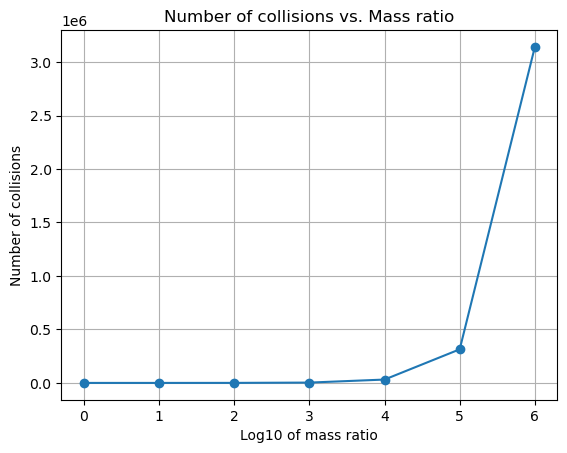

In [38]:
# Initialize lists to store mass ratios and collision counts
mass_ratios = []
collision_counts = []

# Iterate through mass ratios
for d in range(7):  # Range from 0 to 20
    # Set mass ratio m2
    m2 = 100 ** d

    # Initialize variables
    m1 = 1
    m12 = m1 + m2
    x1, vx1 = 1, 0
    x2, vx2 = 1.15, -1
    col = 0
    inf = float('+inf')

    # Simulate collisions
    while True:
        t0 = x1 / -vx1 if vx1 < 0 else inf

        dv = vx2 - vx1
        t1 = (x2 - x1) / -dv if dv < 0 else inf

        dt = min(t0, t1)

        if dt == inf:
            break

        x1 += dt * vx1
        x2 += dt * vx2
        col += 1

        if dt == t0:
            x1 = 0
            vx1 = -vx1
        else:
            x2 = x1
            p = m1 * vx1 + m2 * vx2
            vx1 = (p + m2 * dv) / m12
            vx2 = (p - m1 * dv) / m12

    # Store mass ratio and collision count
    mass_ratios.append(d)
    collision_counts.append(col)

# Plot results
plt.plot(mass_ratios, collision_counts, marker='o')
plt.xlabel('Log10 of mass ratio')
plt.ylabel('Number of collisions')
plt.title('Number of collisions vs. Mass ratio')
plt.grid(True)
plt.show()


The code below prints out the number of collisions for a mass ratio of 1: 2^6 in base 2 format.

In [49]:
m1, m2 = 1, 2**6
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 2
col_binary = bin(col)[2:]

print("Number of collisions in base 2: %s" % col_binary)

Number of collisions in base 2: 11001


The codes below replicate the code above but vary the mass ratio.

In [50]:
m1, m2 = 1, 2**1
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 2
col_binary = bin(col)[2:]

print("Number of collisions in base 2: %s" % col_binary)

Number of collisions in base 2: 101


In [51]:
m1, m2 = 1, 2**2
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 2
col_binary = bin(col)[2:]

print("Number of collisions in base 2: %s" % col_binary)

Number of collisions in base 2: 110


In [52]:
m1, m2 = 1, 2**3
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 2
col_binary = bin(col)[2:]

print("Number of collisions in base 2: %s" % col_binary)

Number of collisions in base 2: 1001


In [53]:
m1, m2 = 1, 2**4
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 2
col_binary = bin(col)[2:]

print("Number of collisions in base 2: %s" % col_binary)

Number of collisions in base 2: 1100


In [54]:
m1, m2 = 1, 2**5
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 2
col_binary = bin(col)[2:]

print("Number of collisions in base 2: %s" % col_binary)

Number of collisions in base 2: 10001


The codes below replicate the ones above but the base is changed to base $3$

In [55]:
m1, m2 = 1, 3**1
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 3
col_binary = bin(col)[3:]

print("Number of collisions in base 3: %s" % col_binary)

Number of collisions in base 3: 01


In [56]:
m1, m2 = 1, 3**2
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 3
col_binary = bin(col)[3:]

print("Number of collisions in base 3: %s" % col_binary)

Number of collisions in base 3: 001


In [58]:
m1, m2 = 1, 3**3
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 3
col_binary = bin(col)[3:]

print("Number of collisions in base 3: %s" % col_binary)

Number of collisions in base 3: 0000


In [59]:
m1, m2 = 1, 3**4
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 3
col_binary = bin(col)[3:]

print("Number of collisions in base 3: %s" % col_binary)

Number of collisions in base 3: 1100


In [60]:
m1, m2 = 1, 3**5
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 3
col_binary = bin(col)[3:]

print("Number of collisions in base 3: %s" % col_binary)

Number of collisions in base 3: 10001


In [61]:
m1, m2 = 1, 3**6
m12 = m1 + m2
x1, vx1 = 1, 0
x2, vx2 = 1.15, -1

col = 0
inf = float('+inf')

while True:
    t0 = x1 / -vx1 if vx1 < 0 else inf

    dv = vx2 - vx1
    t1 = (x2 - x1) / -dv if dv < 0 else inf

    dt = min(t0, t1)

    if dt == inf:
        break

    x1 += dt * vx1
    x2 += dt * vx2
    col += 1

    if dt == t0:
        x1 = 0
        vx1 = -vx1
    else:
        x2 = x1
        p = m1 * vx1 + m2 * vx2
        vx1 = (p + m2 * dv) / m12
        vx2 = (p - m1 * dv) / m12

# Convert the number of collisions to base 3
col_binary = bin(col)[3:]

print("Number of collisions in base 3: %s" % col_binary)

Number of collisions in base 3: 010100


The code below simulates a closed system, where particles that transform in species C are removed from the system.

In [64]:
class Particle:
    def __init__(self, species):
        self.species = species

def collide(particles):
    # Select two random particles
    particle1 = random.choice(particles)
    particle2 = random.choice(particles)
    
    # If the two particles are of different species and one is A and the other is B, remove them from the system
    if particle1.species != particle2.species and 'A' in {particle1.species, particle2.species} and 'B' in {particle1.species, particle2.species}:
        particles.remove(particle1)
        particles.remove(particle2)
    # If the two particles are of different species, they transform into the third species
    elif particle1.species != particle2.species:
        species_set = {'A', 'B', 'C'}
        new_species = (species_set - {particle1.species, particle2.species}).pop()
        particle1.species = new_species
        particle2.species = new_species

def count_species(particles):
    species_count = {'A': 0, 'B': 0, 'C': 0}
    for particle in particles:
        species_count[particle.species] += 1
    return species_count

def simulate(num_A, num_B, num_C, num_steps):
    particles = [Particle('A') for _ in range(num_A)] + \
                [Particle('B') for _ in range(num_B)] + \
                [Particle('C') for _ in range(num_C)]
    
    for step in range(num_steps):
        collide(particles)
        
    species_counts = count_species(particles)
    print("Final distribution of species after {} steps:".format(num_steps))
    for species, count in species_counts.items():
        print("Species {}: {}".format(species, count))

In [65]:
#Running the simulation with 100 particles each and 10,00 collisions
simulate(100, 100, 100, 1000)

Final distribution of species after 1000 steps:
Species A: 0
Species B: 6
Species C: 0


The code below simulates a closed system, where particles that transform in species B are removed from the system.

In [68]:
class Particle:
    def __init__(self, species):
        self.species = species

def collide(particles):
    # Select two random particles
    particle1 = random.choice(particles)
    particle2 = random.choice(particles)
    
    # If the two particles are of different species and one is A and the other is B, remove them from the system
    if particle1.species != particle2.species and 'A' in {particle1.species, particle2.species} and 'C' in {particle1.species, particle2.species}:
        particles.remove(particle1)
        particles.remove(particle2)
    # If the two particles are of different species, they transform into the third species
    elif particle1.species != particle2.species:
        species_set = {'A', 'B', 'C'}
        new_species = (species_set - {particle1.species, particle2.species}).pop()
        particle1.species = new_species
        particle2.species = new_species

def count_species(particles):
    species_count = {'A': 0, 'B': 0, 'C': 0}
    for particle in particles:
        species_count[particle.species] += 1
    return species_count

def simulate(num_A, num_B, num_C, num_steps):
    particles = [Particle('A') for _ in range(num_A)] + \
                [Particle('B') for _ in range(num_B)] + \
                [Particle('C') for _ in range(num_C)]
    
    for step in range(num_steps):
        collide(particles)
        
    species_counts = count_species(particles)
    print("Final distribution of species after {} steps:".format(num_steps))
    for species, count in species_counts.items():
        print("Species {}: {}".format(species, count))

In [69]:
#Running the simulation with 100 particles each and 10,00 collisions
simulate(100, 100, 100, 1000)

Final distribution of species after 1000 steps:
Species A: 0
Species B: 0
Species C: 30


The code below simulates a closed system, where particles that transform in species A are removed from the system.

In [82]:
class Particle:
    def __init__(self, species):
        self.species = species

def collide(particles):
    # Select two random particles
    particle1 = random.choice(particles)
    particle2 = random.choice(particles)
    
    # If the two particles are of different species and one is A and the other is B, remove them from the system
    if particle1.species != particle2.species and 'B' in {particle1.species, particle2.species} and 'C' in {particle1.species, particle2.species}:
        particles.remove(particle1)
        particles.remove(particle2)
    # If the two particles are of different species, they transform into the third species
    elif particle1.species != particle2.species:
        species_set = {'A', 'B', 'C'}
        new_species = (species_set - {particle1.species, particle2.species}).pop()
        particle1.species = new_species
        particle2.species = new_species

def count_species(particles):
    species_count = {'A': 0, 'B': 0, 'C': 0}
    for particle in particles:
        species_count[particle.species] += 1
    return species_count

def simulate(num_A, num_B, num_C, num_steps):
    particles = [Particle('A') for _ in range(num_A)] + \
                [Particle('B') for _ in range(num_B)] + \
                [Particle('C') for _ in range(num_C)]
    
    for step in range(num_steps):
        collide(particles)
        
    species_counts = count_species(particles)
    print("Final distribution of species after {} steps:".format(num_steps))
    for species, count in species_counts.items():
        print("Species {}: {}".format(species, count))

#Running the simulation with 100 particles each and 10,00 collisions
simulate(100, 100, 100, 1000)

Final distribution of species after 1000 steps:
Species A: 0
Species B: 0
Species C: 12


The code below varies the initial distribution of 'undesired' species

In [83]:
class Particle:
    def __init__(self, species):
        self.species = species

def collide(particles):
    # Select two random particles
    particle1 = random.choice(particles)
    particle2 = random.choice(particles)
    
    # If the two particles are of different species and one is A and the other is B, remove them from the system
    if particle1.species != particle2.species and 'B' in {particle1.species, particle2.species} and 'C' in {particle1.species, particle2.species}:
        particles.remove(particle1)
        particles.remove(particle2)
    # If the two particles are of different species, they transform into the third species
    elif particle1.species != particle2.species:
        species_set = {'A', 'B', 'C'}
        new_species = (species_set - {particle1.species, particle2.species}).pop()
        particle1.species = new_species
        particle2.species = new_species

def count_species(particles):
    species_count = {'A': 0, 'B': 0, 'C': 0}
    for particle in particles:
        species_count[particle.species] += 1
    return species_count

def simulate(num_A, num_B, num_C, num_steps):
    particles = [Particle('A') for _ in range(num_A)] + \
                [Particle('B') for _ in range(num_B)] + \
                [Particle('C') for _ in range(num_C)]
    
    for step in range(num_steps):
        collide(particles)
        
    species_counts = count_species(particles)
    print("Final distribution of species after {} steps:".format(num_steps))
    for species, count in species_counts.items():
        print("Species {}: {}".format(species, count))

#Running the simulation with 100 particles each and 10,00 collisions
simulate(100, 100, 50, 1000)

Final distribution of species after 1000 steps:
Species A: 0
Species B: 0
Species C: 16


Running the simulation code above $10,000$ times and plotting the results

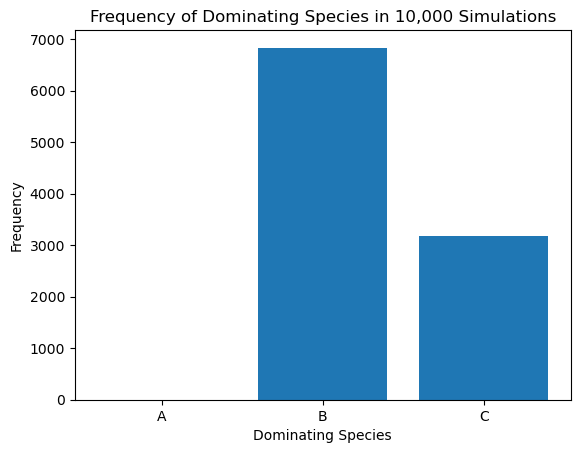

In [84]:
class Particle:
    def __init__(self, species):
        self.species = species

def collide(particles):
    # Select two random particles
    particle1 = random.choice(particles)
    particle2 = random.choice(particles)
    
    # If the two particles are of different species and one is A and the other is B, remove them from the system
    if particle1.species != particle2.species and 'B' in {particle1.species, particle2.species} and 'C' in {particle1.species, particle2.species}:
        particles.remove(particle1)
        particles.remove(particle2)
    # If the two particles are of different species, they transform into the third species
    elif particle1.species != particle2.species:
        species_set = {'A', 'B', 'C'}
        new_species = (species_set - {particle1.species, particle2.species}).pop()
        particle1.species = new_species
        particle2.species = new_species

def count_species(particles):
    species_count = {'A': 0, 'B': 0, 'C': 0}
    for particle in particles:
        species_count[particle.species] += 1
    return species_count

def simulate(num_A, num_B, num_C, num_steps):
    results = {'A': 0, 'B': 0, 'C': 0}  # Store the results of each simulation run
    
    for _ in range(10000):
        particles = [Particle('A') for _ in range(num_A)] + \
                    [Particle('B') for _ in range(num_B)] + \
                    [Particle('C') for _ in range(num_C)]
        
        for _ in range(num_steps):
            collide(particles)
            
        species_counts = count_species(particles)
        dominating_species = max(species_counts, key=species_counts.get)
        results[dominating_species] += 1
    
    # Plotting the results
    plt.bar(results.keys(), results.values())
    plt.xlabel('Dominating Species')
    plt.ylabel('Frequency')
    plt.title('Frequency of Dominating Species in 10,000 Simulations')
    plt.show()

# Running the simulation with 100 particles each and 1000 steps
simulate(100, 100, 50, 1000)


The code below prints out a table of the values of theta (in radians) compared to the ratio $\frac{m_1}{m_2}$

In [87]:
# Header for the table
print(f"{'Mass Ratio':<15}{'Formula':<40}{'Theta (radians)':<20}")

# Iterating through the values of d from 1 to 20
for d in range(1, 20):
    m1 = 10**d
    m2 = 1
    # Calculating theta
    theta = np.arctan(np.sqrt(m2) / np.sqrt(m1))
    # Printing each row
    print(f"10^{d} : 1{'':<5}{f'arctan(sqrt(1)/sqrt(10^{d}))':<40}{theta:<20.15f}")


Mass Ratio     Formula                                 Theta (radians)     
10^1 : 1     arctan(sqrt(1)/sqrt(10^1))              0.306277369169669   
10^2 : 1     arctan(sqrt(1)/sqrt(10^2))              0.099668652491162   
10^3 : 1     arctan(sqrt(1)/sqrt(10^3))              0.031612241996191   
10^4 : 1     arctan(sqrt(1)/sqrt(10^4))              0.009999666686665   
10^5 : 1     arctan(sqrt(1)/sqrt(10^5))              0.003162267119306   
10^6 : 1     arctan(sqrt(1)/sqrt(10^6))              0.000999999666667   
10^7 : 1     arctan(sqrt(1)/sqrt(10^7))              0.000316227755476   
10^8 : 1     arctan(sqrt(1)/sqrt(10^8))              0.000099999999667   
10^9 : 1     arctan(sqrt(1)/sqrt(10^9))              0.000031622776591   
10^10 : 1     arctan(sqrt(1)/sqrt(10^10))             0.000010000000000   
10^11 : 1     arctan(sqrt(1)/sqrt(10^11))             0.000003162277660   
10^12 : 1     arctan(sqrt(1)/sqrt(10^12))             0.000001000000000   
10^13 : 1     arctan(sqrt(1)/sqrt